In [70]:
import json
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import names

f = '/Users/sanahsuri/Downloads/archive/IMDB_movie_details.json'
movies = []
for line in open(f):
    movies.append(json.loads(line))

n = len(movies)
plot_summaries = np.empty(n, dtype=object)

for i in range(n): 
    plot_summaries[i] = word_tokenize(movies[i]['plot_summary'])

m_list, f_list = np.empty(n, dtype=object), np.empty(n, dtype=object)
males = names.words('male.txt') 
females = names.words('female.txt')

word = plot_summaries[0]

def count_mf(word):
    count_m, count_f = 0, 0
    for i in word:
        if i in males:
            count_m += 1
        elif i in females:
            count_f += 1
    return (count_m, count_f)

for i in range(n):
    m_list[i] = count_mf(plot_summaries[i])[0]
    f_list[i] = count_mf(plot_summaries[i])[1]


In [62]:
import pandas as pd 
df_details = pd.read_json(f, lines=True)

In [68]:
def toFloat(x):
    return float(x)
df_details['rating'] = df_details['rating'].apply(toFloat)

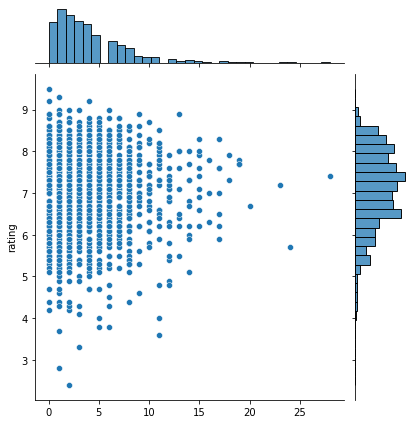

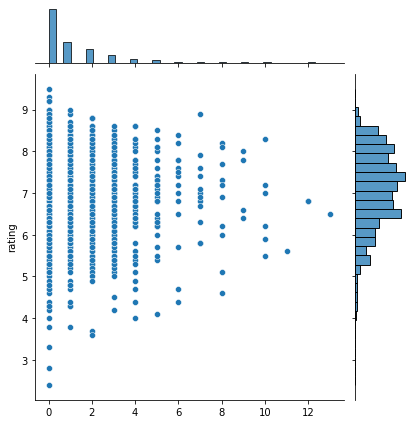

In [80]:
import seaborn as sns
ratings = df_details['rating']
sns.jointplot(x = m_list, y = ratings);
sns.jointplot(x = f_list, y = ratings);

In [101]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

r = '/Users/sanahsuri/Downloads/archive/IMDB_reviews.json'
# reviews = []
# for line in open(f):
#     reviews.append(json.loads(line))
# print(reviews[0])

df_reviews = pd.read_json(r, lines=True)

In [228]:
train = df_reviews.sample(n=5000, random_state=1)
df = df_reviews.drop(train.index)
test = df.sample(n=3500, random_state=2)

In [229]:
categories = [True, False]
from time import time 
from optparse import OptionParser
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
op = OptionParser()
argv = []
sys.argv[1:]
(opts, args) = op.parse_args(argv)

In [230]:
print("Extracting features from the training data using a count vectorizer")
t0 = time()
countvec = CountVectorizer(stop_words='english', ngram_range=(1,4), max_df=0.5, min_df=0.01)
# should contain same words 
X_train = countvec.fit_transform(train['review_text'])
X_test  = countvec.transform(test['review_text']) # Extracting features from the test data using the same vectorizer
duration = time() - t0
# check computational effort to compute the features
print("done in %fs at %0.3fMB/s" % (duration, len(train) / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)

Extracting features from the training data using a count vectorizer
done in 4.595236s at 1088.083MB/s
n_samples: 5000, n_features: 1929


In [231]:
import pandas as pd
X_train_countvec_df = pd.DataFrame(X_train.todense())

# This are the different "words" that are in our vocabulary:
X_train_countvec_df.columns = sorted(countvec.vocabulary_)
print(X_train_countvec_df.columns)
# This shows how a rows of our feature matrix look like:
X_train_countvec_df

Index(['10', '10 10', '100', '11', '12', '13', '15', '20', '2001', '30',
       ...
       'year old', 'years', 'years ago', 'years later', 'years old', 'yes',
       'york', 'young', 'younger', 'zero'],
      dtype='object', length=1929)


,10,10 10,100,11,12,13,15,20,2001,30,...,year old,years,years ago,years later,years old,yes,york,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
X_train_countvec_df

,10,10 10,100,11,12,13,15,20,2001,30,...,year old,years,years ago,years later,years old,yes,york,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
print("Extracting features from the training data using a TF-IDF vectorizer")
t0 = time()
vectorizer_tfidf = TfidfVectorizer(sublinear_tf=True,
                             stop_words='english', ngram_range=(1,4), max_df=0.5, min_df=0.01)
X_train_tfidf = vectorizer_tfidf.fit_transform(train['review_text'])
X_test_tfidf = vectorizer_tfidf.transform(test['review_text']) # Extracting features from the test data using the same vectorizer
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, len(train)  / duration))
print("n_features: %d" % X_train_tfidf.shape[1])

Extracting features from the training data using a TF-IDF vectorizer
done in 4.659325s at 1073.117MB/s
n_features: 1929


In [234]:
y_train = train['is_spoiler'] 
y_test=test['is_spoiler']

from sklearn.linear_model import LogisticRegression
t0 = time()
lr =LogisticRegression(solver='lbfgs',max_iter=500,multi_class='multinomial').fit(X_train,train['is_spoiler'])
print("Runtime of training of "+str(lr)+" with count vectorizer encoding: ",format(time()-t0,"0.3f"),"s")
t0 = time()
print("Mean accuracy of model "+str(lr)+" on training data with count vectorizer encoding: ",lr.score(X_train,y_train))
print("Mean accuracy of model "+str(lr)+" on test data with count vectorizer encoding: ",lr.score(X_test,y_test))
print("Runtime of evaluating "+str(lr)+" on training and test data with count vectorizer encoding: ",format(time()-t0,"0.3f"),"s")


# We observe that the training time is reasonable, but not trivial anymore. On the other hand, evaluating the model (calculating the accuaracy) is still very quick
# 
# Now, we repeat this with the TF-IDF features.

Runtime of training of LogisticRegression(max_iter=500, multi_class='multinomial') with count vectorizer encoding:  0.715 s
Mean accuracy of model LogisticRegression(max_iter=500, multi_class='multinomial') on training data with count vectorizer encoding:  0.9198
Mean accuracy of model LogisticRegression(max_iter=500, multi_class='multinomial') on test data with count vectorizer encoding:  0.6925714285714286
Runtime of evaluating LogisticRegression(max_iter=500, multi_class='multinomial') on training and test data with count vectorizer encoding:  0.004 s


In [235]:
t0 = time()
lr2 =LogisticRegression(solver='lbfgs',max_iter=150,multi_class='multinomial').fit(X_train_tfidf,train['is_spoiler'])
print("Runtime of training of "+str(lr2)+" with TF-IDF encoding: ",format(time()-t0,"0.3f"),"s")
t0 = time()
print("Mean accuracy of model "+str(lr2)+" on training data with TF-IDF encoding: ",lr2.score(X_train_tfidf,y_train))
print("Mean accuracy of model "+str(lr2)+" on test data with TF-IDF encoding: ",lr2.score(X_test_tfidf,y_test))
print("Runtime of evaluating "+str(lr2)+" on training and test data with TF-IDF encoding: ",format(time()-t0,"0.3f"),"s")

Runtime of training of LogisticRegression(max_iter=150, multi_class='multinomial') with TF-IDF encoding:  0.196 s
Mean accuracy of model LogisticRegression(max_iter=150, multi_class='multinomial') on training data with TF-IDF encoding:  0.8196
Mean accuracy of model LogisticRegression(max_iter=150, multi_class='multinomial') on test data with TF-IDF encoding:  0.7525714285714286
Runtime of evaluating LogisticRegression(max_iter=150, multi_class='multinomial') on training and test data with TF-IDF encoding:  0.005 s


In [227]:
from sklearn.linear_model import LogisticRegressionCV
# We focus on the TF-IDF model as it exhibited better performance above.
t0 = time()
lr_optimal = LogisticRegressionCV(Cs=20,cv=5, random_state=10,penalty='l2', max_iter=500,multi_class='multinomial',solver='lbfgs',refit=True).fit(X_train_tfidf, y_train)
print("Runtime of crossvalidation:",format(time()-t0,"0.3f"),"s")
print("Mean accuracy of model "+str(lr_optimal)+" on training data with TF-IDF encoding: ",lr_optimal.score(X_train_tfidf,y_train))
print("Mean accuracy of model "+str(lr_optimal)+" on test data with TF-IDF encoding: ",lr_optimal.score(X_test_tfidf,y_test))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Runtime of crossvalidation: 32.258 s
Mean accuracy of model LogisticRegressionCV(Cs=20, cv=5, max_iter=500, multi_class='multinomial',
                     random_state=10) on training data with TF-IDF encoding:  0.8026
Mean accuracy of model LogisticRegressionCV(Cs=20, cv=5, max_iter=500, multi_class='multinomial',
                     random_state=10) on test data with TF-IDF encoding:  0.756
